[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mnl8lcr/GST_Work/blob/master/New_&_Inspired_MLE_for_Oscillating_Probability.ipynb)

# Fresh & Inspired MLE

## 1. Physical model for observed drift signal

## 2. Mathematical framework for likelihood function

### Likelihood function for a generic set of observations

The likelihood of a set of parameter values, for a set of observations ${\cal L}({\rm parameters} | {\rm observations})$  is given by the probability of the observations, given the parameters, $p({\rm observations}| {\rm parameters})$.

Suppose observation $k$ occurs with probability $p_k(\theta)$, where $\theta$ represents the parameters.

### Likelihood function for drift model

This notebook will attempt to further and implement the log-likelihood MLE introduced in section 4.1.4 of Prof. Chuang's Quantum Drum paper, but for my drift model.

Starting with
    
$$p_{1} (t) = 0.5 + a \sin(2\pi f t + \phi )$$
$$p_{0} (t) = 1 - p_{1} (t) = 0.5 - a \sin(2\pi f t + \phi )$$

These give us the following log-likelihood ($\cal L$) function for N-data points $(t_{i}, y_{i})$, each with probability $p_{i}$:
$$\cal L = -\Sigma_{i}^{N} \log(p_{i})$$
$$ = -\Sigma_{i}^{N} \log[(1-y_{i})p_{0}(t_{i}) + y_{i} p_{1}(t_{i})]$$
$$ = -\Sigma_{i}^{N} \log[(1-y_{i})(0.5 - a \sin(2\pi f t_{i} + \phi )) + y_{i} p_{1}(0.5 + \sin(2\pi f t_{i} + \phi ))]$$

NEW LOSS FUNCTION METHOD:

Alternatively, the new loss function defined today was:
$${\rm loss} = -\Sigma_{k}p_{k} = \left(\frac{N_{0}}{N}p_{0} + \frac{N_{1}}{N}p_{1} \right)N$$
for possible outcomes k, which are 0 or 1. This can be written as the following integral for large N:

$$ {\rm loss} = -\int_{t=0}^{T} \left [ p_{0}^X(t)p_{0}(t) - p_{1}^X(t)p_{1}(t)  \right] \mathrm{d}t$$
$$ = -\int_{0}^{T} (0.5 - X \sin{2\pi Z t + W})(0.5 - a \sin{2\pi f t + \phi }) + (0.5 + X \sin{2\pi Z t + W})(0.5 + a \sin{2\pi f t + \phi })] \mathrm{d}t$$

where {$X$, $Z$, $W$} are the pseudo-parameters from the data that must be fit to the actual parameters of the model, {$a$, $f$, $\phi$}.

## Solving the Integral and Plotting

The solved form of the integral labeled $\mathrm{loss}(X, Z, W, a, f, \phi)$ will be covered here. Hopefully, we can plot the loss function for various pseudo-parameters to learn about the shape of the function and how we can find the actual data parameters.

We have:

$$\mathrm{loss} = -\int_{0}^T [\frac{1}{2} + 2Xa \sin{(2\pi Zt + W)\sin{(2\pi ft + \phi)}]}  dt$$

which, using the trig identity $sinAsinB = \frac{1}{2}[cos(A-B) - cos(A+B)]$, for $A = 2\pi Zt + W$ and $B = 2\pi ft + \phi$, we can rewrite as:

$$\mathrm{loss} = -\int_{0}^T {\frac{1}{2} + Xa\cos{[2\pi (Z - f)t + (W-\phi)}] - Xa\cos{[2\pi (Z+f)t + (W + \phi)}]} dt$$

Hopefully without any math errors, this should give:
$$\mathrm{loss} = -\frac{T}{2} - \frac{Xa}{2\pi (Z - f)}{(\sin{[2\pi(Z - f)T + (W - \phi)]} - \sin{[W - \phi]})} + \frac{Xa}{2\pi (Z + f)}(\sin{[2\pi(Z + f)T + (W + \phi)]} - \sin{[W + \phi]})$$

The ideal case is when $Z = f$, $X = a$, and $W = \phi$, which leaves a zero in the denominator for the second term. This will require some L'Hopital's rule stuff.


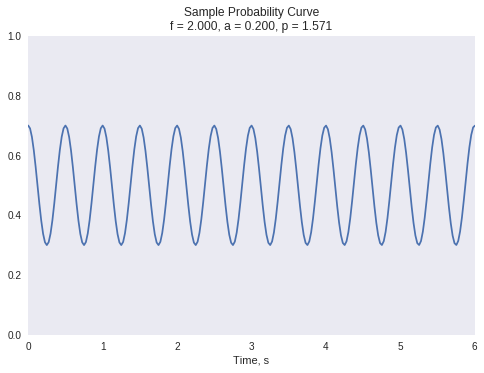

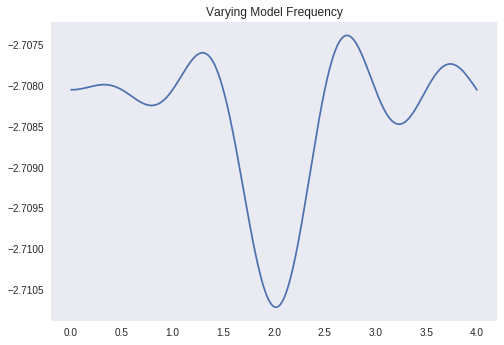

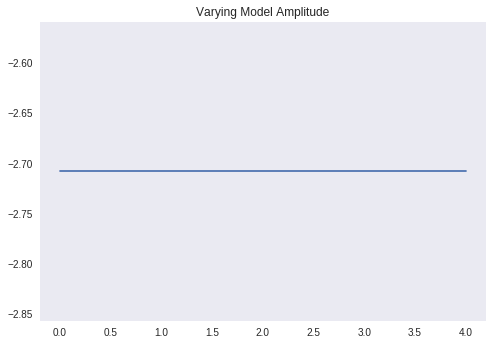

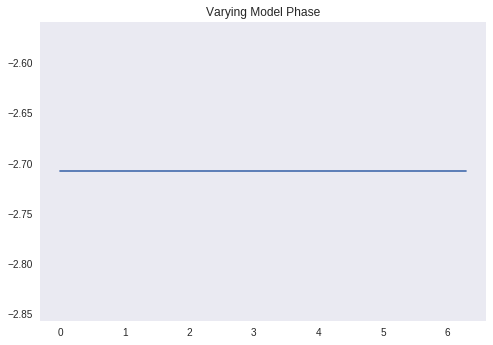

In [13]:
import numpy as np
import pylab as plt
from numpy import pi, sin, cos

def p1(t, a, f, p):
  'probability of being in the 1-state as a function of time'
  return 0.5 + a*sin(2*pi*f*t + p)
 
#create an oscillating probability here and plot it.
T = 30
a = 0.2
f = 2.0
p = 0.5*pi
times = np.linspace(0, T, 1200)
probs = p1(times, a, f, p)
plt.plot(times, probs)
plt.xlim(0, 6)
plt.xlabel("Time, s")
plt.title("Sample Probability Curve\nf = {:.3f}, a = {:.3f}, p = {:.3f}".format(f, a, p))
plt.grid()
plt.ylim(0,1)
plt.show()

def loss(X, Z, W, a, f, p):
  #the solved integral form of the loss function above
  term1 = T/2
  term2 = X*a/(2*pi*(Z-f + 1e-8))*( sin(2*pi*(Z-f)+(W-p)) - sin(W-p) )
  term3 = X*a/(2*pi*(Z+f + 1e-8))*( sin(2*pi*(Z+f)+(W+p)) - sin(W+p) )
  return -np.log(term1 + term2 - term3)
  #return -term1 - term2 + term3

#attempt to plot the loss function; it doesn't look too good...
X = a
Z = np.linspace(0.0, 4, 500)
W = p
losses = loss(X, Z, W, a, f, p)
plt.plot(Z, losses)
plt.grid()
plt.title("Varying Model Frequency")
plt.show()

X = np.linspace(0, 4, 500)
Z = f
W = p
losses = loss(X, Z, W, a, f, p)
plt.plot(X, losses)
plt.title("Varying Model Amplitude")
plt.grid()
plt.show()

X = a
Z = f
W = np.linspace(0, 2*pi, 500)
losses = loss(X, Z, W, a, f, p)
plt.plot(W, losses)
plt.title("Varying Model Phase")
plt.grid()
plt.show()


Something is wrong with the scale of the numbers I'm putting in. The only thing that creates any variation is frequency, so I'm not sure if that's just a syntax error somewhere, or if there's actually a scale issue with the amount of variation that phase or amplitude fluctuations create.